Configure path envirorment

In [ ]:
import sys
import os

sys.path.append(os.getcwd()[:-4])

: 

Import Libraries

In [2]:
import numpy as np

from examples.binary_knapsack import BinaryKnapSack
from src.crossover.one_point_crossover import OnePointCrossover
from src.crossover.order_crossover import OrderCrossover
from src.mutation.position_mutation import PositionMutation
from src.mutation.binary_mutation import BinaryMutation
from src.selection.tournament_selection import TournamentSelection

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Defining Items Weights and Profits 

Test case (08) from: https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/

Items | Weights | Profits 
------- | -------- | -------- 
A | 382745 | 825594  
B | 799601 | 1677009 
C | 909247 | 1676628 
... | ... | ... 

In [16]:
n_items = 24
capacity = 6404180
weights = np.array([382745, 799601, 909247, 729069, 467902,  44328,  34610, 698150, 823460, 903959, 853665, 551830, 610856, 670702, 488960, 951111, 323046, 446298, 931161,  31385, 496951, 264724, 224916, 169684])
profits = np.array([825594,1677009,1676628,1523970, 943972,  97426,  69666,1296457,1679693,1902996,1844992,1049289,1252836,1319836, 953277,2067538, 675367, 853655,1826027,  65731, 901489, 577243, 466257, 369261])

Creating the genetic algorithm model

In [18]:
params = {
    "n_individuals" : [20, 50, 100],
    "n_generations" : [25, 50, 100],
    "n_genes"       : [n_items],
    "otimizer"      : np.argmax,
    "mutation_rate" : [0.01, 0.05, 0.1],
    "selection"     : [TournamentSelection()],
    "crossover"     : [OrderCrossover(), OnePointCrossover()],
    "mutation"      : [BinaryMutation(), PositionMutation()],
}
kwargs = {
    "weights"  : weights,
    "profits"  : profits,
    "capacity" : capacity
}
best_fitness, best_params = BinaryKnapSack().grid_search(**params, **kwargs)
print('Best Fitness:', best_fitness)
print('Best Params:', best_params)

Best Fitness: 13491535.4
Best Params: {'n_individuals': 100, 'n_genes': 24, 'n_generations': 100, 'otimizer': <function argmax at 0x7f6d9311e5c0>, 'mutation_rate': 0.1, 'selection': <src.selection.tournament_selection.TournamentSelection object at 0x7f6d6f0b5690>, 'crossover': <src.crossover.one_point_crossover.OnePointCrossover object at 0x7f6d6f0b4890>, 'mutation': <src.mutation.binary_mutation.BinaryMutation object at 0x7f6d6f0b7fd0>}


Creating the genetic algorithm model with best params

In [19]:
model = BinaryKnapSack(
    n_individuals = best_params['n_individuals'],
    n_generations = best_params['n_generations'],
    n_genes = best_params['n_genes'],
    otimizer = best_params['otimizer'],
    mutation_rate = best_params['mutation_rate'],
    ** kwargs
)

model.set_selection(best_params['selection'])
model.set_crossover(best_params['crossover'])
model.set_mutation(best_params['mutation'])

Running the Optimization for ten steps

In [20]:
steps = 10
fitness_evolution = [] # Best fitness evolution for executions
history_individuals = [] # Mantain all the history individuals from last execution
for i in range(steps):
    best_individual = model.simulate()
    best_fitness += model.fitness([best_individual])[0]
    fitness_evolution.append([max(model.fitness(generation)) for generation in model.history_individuals])
    history_individuals = np.array(model.history_individuals)

fitness_evolution = np.array(fitness_evolution)

Visualizing the mean fitness and best fitness evolution for last execution

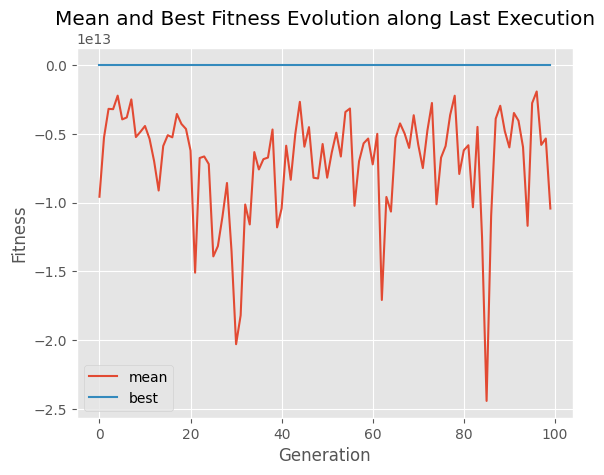

In [21]:
mean_fitness = np.array([np.mean(model.fitness(generation)) for generation in history_individuals])
max_fitness = np.array([np.max(model.fitness(generation)) for generation in history_individuals])

x = np.arange(mean_fitness.shape[0])
plt.plot(x,mean_fitness,label='mean')
plt.plot(x,max_fitness, label='best')
plt.title('Mean and Best Fitness Evolution along Last Execution')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.show()

Visualizing Best Fitness Evolution for each execution

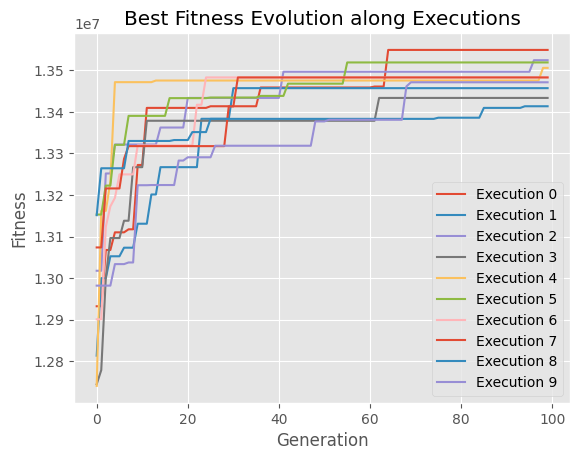

In [22]:
x = np.arange(fitness_evolution.shape[1])
for i,execution in enumerate(fitness_evolution):
    plt.plot(x, execution, label = f"Execution {i}")
plt.title('Best Fitness Evolution along Executions')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.show()